# Author's Notes

This is the original code for Dimensionality Reduction on the original MNIST dataset for Chapter 3 in the Hands-on Unsupervised Learning book.

As of May 2021, there is a separate (supplemental) notebook for Dimensionality Reduction on the Fashion MNIST dataset, too.

From [Hands-on Unsupervised Learning using Python](https://amzn.to/2tVABNx) - Chapter 3 - Dimensionality Reduction

# Google Colab Setup
**Only for users on Google Colab**

In [ ]:
"""# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/My Drive/github/handson-unsupervised-learning/")"""

Mounted at /content/drive
Original path:  /content
New path:  /content/drive/My Drive/github/handson-unsupervised-learning


# Import Libraries

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

'''Data Prep'''
from sklearn import preprocessing as pp 

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# Load & Explore Data

In [2]:
# Load the datasets(MNOST)
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'mnist_data', 'mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [3]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [4]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [9]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Describe the training matrix
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022784,0.015424,0.012080,0.007218,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [6]:
# Show the labels
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

In [7]:
# Define function to view digit
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

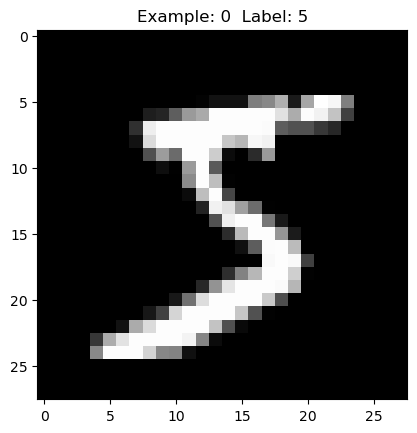

In [8]:
# View the first digit
view_digit(0)

In [10]:
# Define one-hot encoder function
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

In [11]:
# Define reversal of one-hot encoder function
def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

In [12]:
# Create one-hot vectors for the labels
y_train_oneHot = one_hot(y_train)
y_validation_oneHot = one_hot(y_validation)
y_test_oneHot = one_hot(y_test)

In [13]:
# Show one-hot vector for example 0, which is the number 5
y_train_oneHot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# Linear Dimensionality Reduction

ex) PCA, SVD, random projection

## PCA


https://www.turing.com/kb/guide-to-principal-component-analysis

In [14]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

"""apply PCA"""
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [15]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0000000317277462


In [16]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4887623]
Variance Captured by First 20 Principal Components:  [0.6439802]
Variance Captured by First 50 Principal Components:  [0.82486093]
Variance Captured by First 100 Principal Components:  [0.9146585]
Variance Captured by First 200 Principal Components:  [0.9665007]
Variance Captured by First 300 Principal Components:  [0.9862489]


<AxesSubplot:>

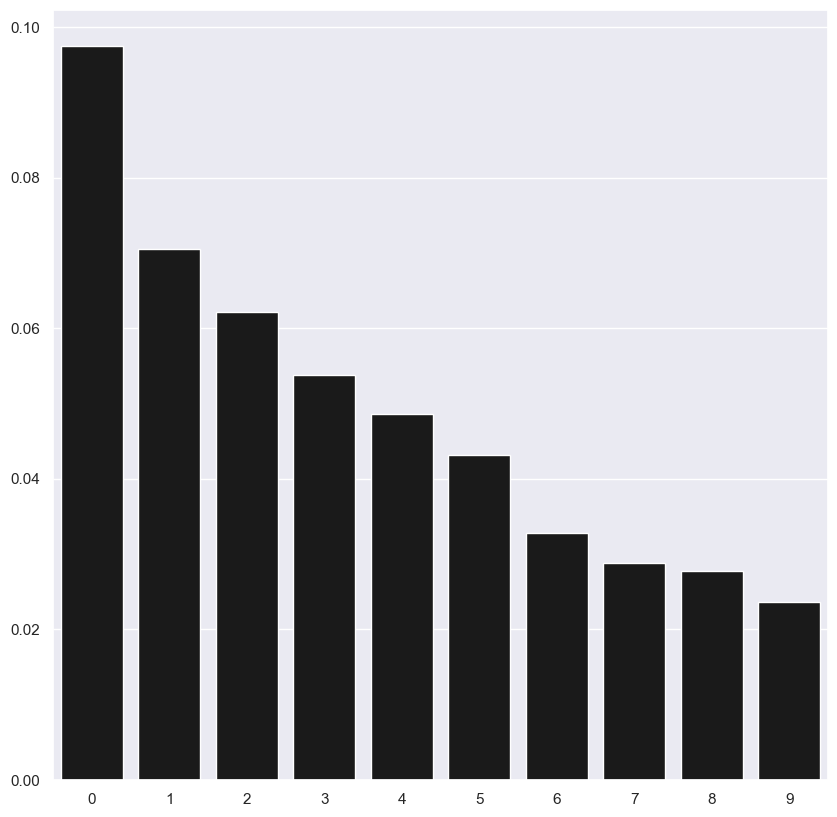

In [17]:
# View percentage captured by first X components
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

In [18]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

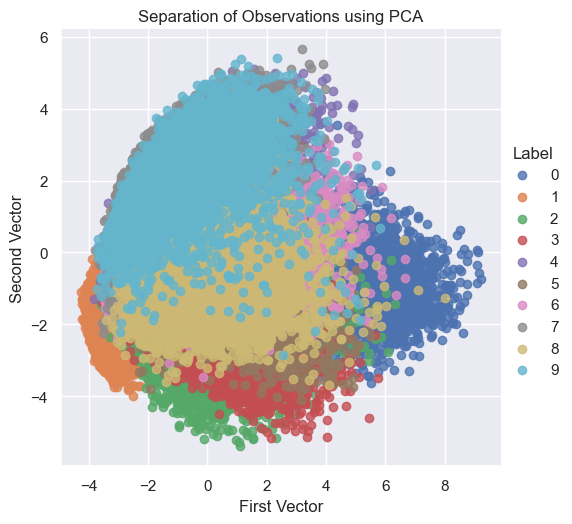

In [19]:
# View scatterplot
scatterPlot(X_train_PCA, y_train, "PCA")

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

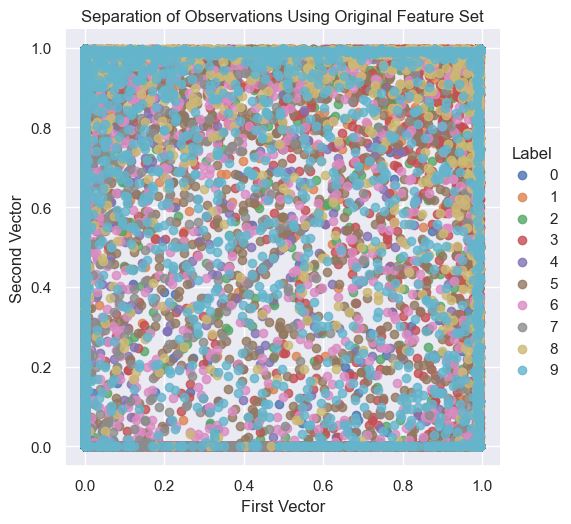

In [20]:
# View two random dimensions
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

## Incremental PCA   

- 데이터셋의 크기가 매우 커서 메모리에 저장할 수 없는 경우, 메모리에 저장되는 크기로      
  배치를 작세 설정해 점진적으로 PCA를 수행할 수 있음    

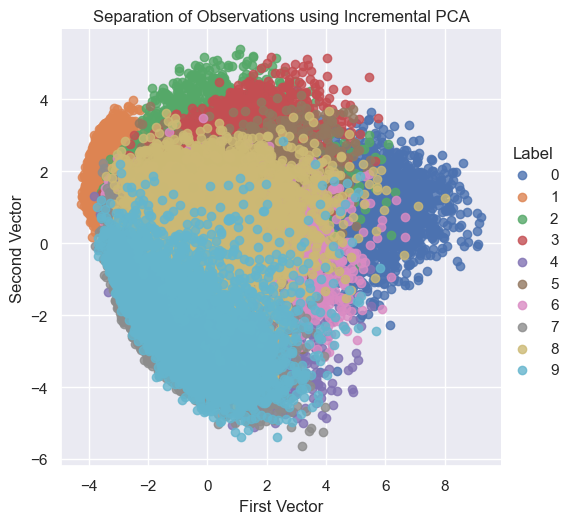

In [21]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = \
    pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

## Sparse PCA

- 일반 PCA 알고리즘은 모든 입력변수에서 선형 결합을 탐색해 원본 피처 공간을 최대한 조밀하게 줄임    
- But, 일부 머신러닝 문제의 경우 어느 정도의 희소성(saparsity)이 선호될 수 있음    
  - 일반 pca보다 훈련속도 느림    

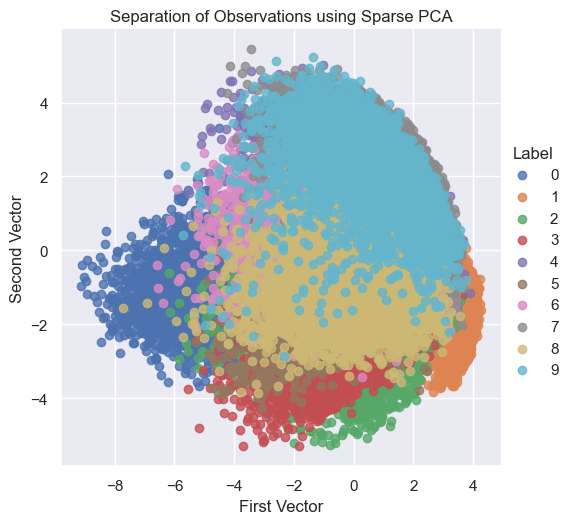

In [22]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
    pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

## Kernel PCA

- PCA, Incremental PCA, Sparse PCA는 원본 데이터를 저차원  공간에 선형을 투영하지만      
- 비선형 PCA 유형중 하나인 Kernel PCA는 원본 데이터 포인트 쌍들에 대해 유사성 함수를      
  실행시켜 비선형적으로 차원을 축소      

- 주성분의 수, 커널 유형, 감마(gamma)라는 커널 계수 설정 필요     
- 가장 많이 사용하는 커널은 방사형 기저 함수 커널(radial basis function kernel)이며,     
  보통 RBF kernel이라고 함      


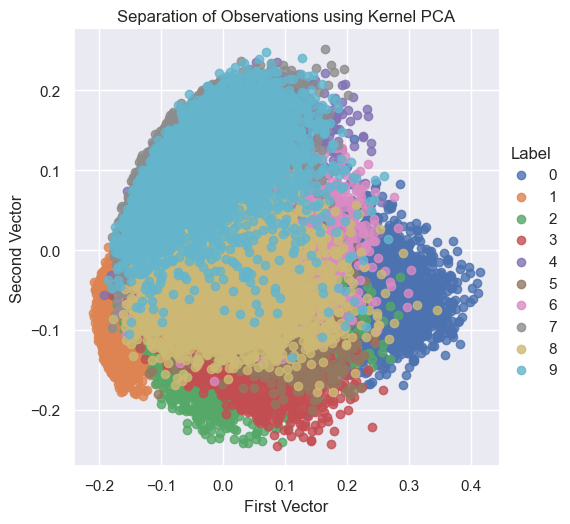

In [23]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = \
    pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

## SVD(Singular Value Decomposition)    
- 원본 행렬의 개수(rnak)를 더 작은 계수로 줄이고    
  더 작은 계수 행렬에서 일부 벡터의 선형 결합을 사용해 원본 행열을 다시 만들 수 있도록 하는 것     

- 더 작은 계수 행렬을 생성하기 위해 SVD는 가장 많은 정보를 가진 원본 행렬의 벡터를 유지(즉, 가장 높은 특잇값).   
  작아진 계수 행렬은 원본 피처 공간의 가장 중요한 요소들을 포착    

- PCA는 공분산 행렬의 고윳값 분해를 사용해 차원 축소 수행(pca연산 svd를 포함함)        
- SVD는 특잇값 분해를 사용     

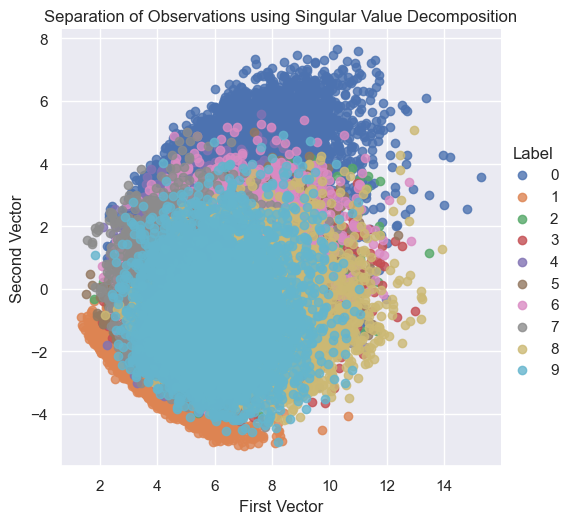

In [24]:
# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

## GRP(Gaussian Random Projection)
- 랜덤 두텽에는 두 가지 버전 있음
  - 가우시안 랜덤 투(Gaussian Random Projection). 
  - 희소 랜덤 투영(sparse random projection).    
- 가우시간 램덤 투영의 경우 축소된 피처 공간에 갖고 싶은 주성분의 수를 설정하거나 하이퍼파라머터인 입실론eps  
- eps는 존슨-린덴슈트라우스 보조정리에 따라 임베딩의 품질을 제어하며 이 값이 작을수록 차원의 수가 높아짐    


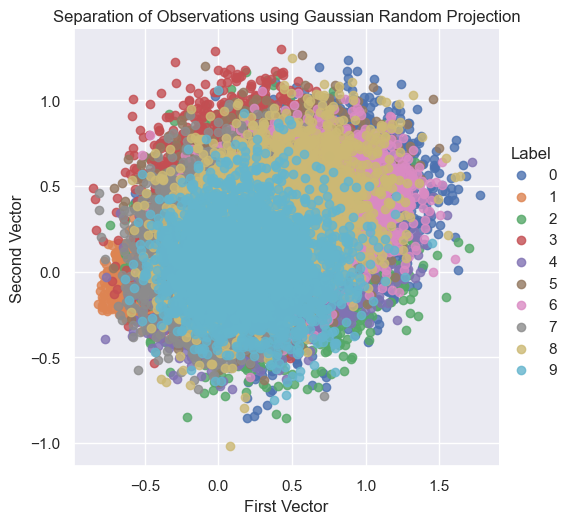

In [25]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

## SRP(Sparse Random Projection)
- 랜덤 투영에서 희소 버전    
- SRP는 변환된 피처셋에서 어느 정도의 희소성을 유지하며    
  일반적으로 GRP보다 훨씬 빠르게 원본 데이터를 축소된 공간으로 변환시킴으로써 훨씬 효율적    
  

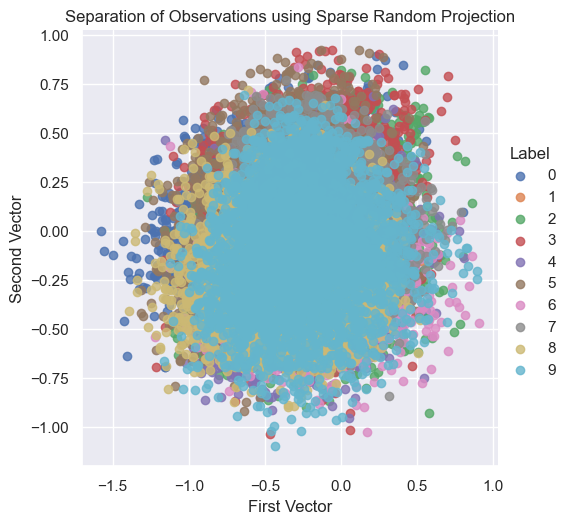

In [26]:
# Sparse Random Projection
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
        random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

# Non-Linear Dimensionality Reduction    

비선형 차원 축소 방법<- 매니폴드 학습

## Isomap(isometric mapping)
- isomap은 유클리드 거리가 아닌  곡선 거리 또는 지오데식 거리로    
  모든 데이터 포인트 간의 쌍별 거리를 계산해 원본 피처셋의 새로운 저차원 임베딩을 학습    

- 즉, Isomap은 매니폴드 공간에서 각 포인트들과 이웃하는 포인트들 간의 상대적인 위치를 기반으로   
  원본데이터의 고유한 기하학 구조를 학습    

(*매니폴드: 극소적로 유클리드 공간과 닮은 위상공간, 즉 두 점 사이의 거리 혹은 유사도가 근거리에서는       
유클라디안거리(Eucidean metric, 직선 거리)를 따르지만 원거리에서는 그렇지 않은 공간을 말함)   

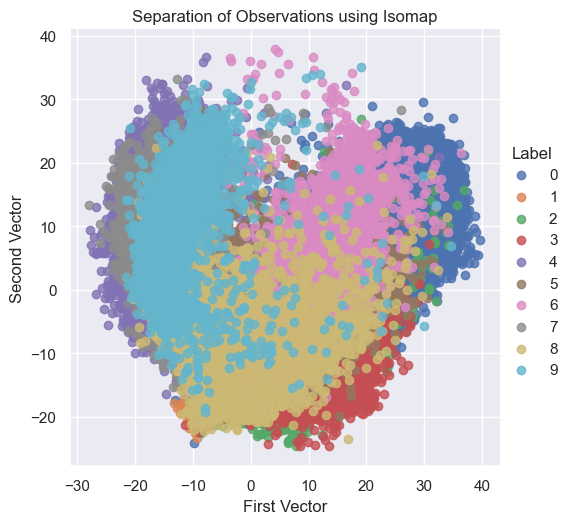

In [27]:
# Isomap

from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, \
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, \
                                   index=validation_index)

scatterPlot(X_train_isomap, y_train, "Isomap")

## MDS(Multidimensional Scaling)    
- 비선형 차원 축소의 한 유형으로, 원본 데이터셋에서 데이터 포인트들의 유사성을 학습,      
  이 유사성 학습 결과를 사용해 더 낮은 차원 공간에서 이것을 모델링    

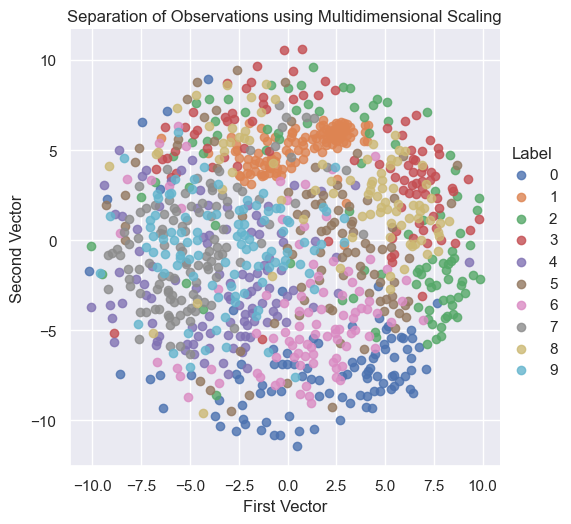

In [28]:
# MDS(Multidimensional Scaling)
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

## LLE(Locally Linear Embedding)    

- 원본 피처 공간에서 축소된 공간으로 데이터를 투영할 때 지역 내 이웃과의 거리 유지    
- LLE는 데이터를 더 작은 성분(즉, 포인트들의 이웃)으로 분할하고 각 성분을    
  선형 임베딩으로 모델링 해 고차원 데이터에서 비선형 구조를 발견   
  

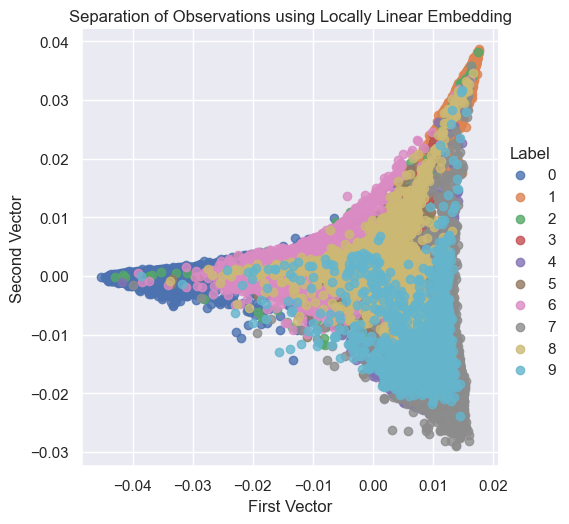

In [29]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
        n_components=n_components, method=method, \
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

## t-SNE
t-분포 확률적 임베딩(t-distributed stochastic neighbor embedding)      

- t-sne은 각 고차원 데이터 포인트를 2차원 또는 3차원 공간으로 모델링해 이를 수행   
- 유사한 포인트들은 서로 가깝게 모델링되고 유사하지 않은 포인트들은 더 멀리 모델링되고   
  유사하지 않은 포인트들은 더 멀리 모델링    
- 포인트 쌍들을 이용해 고차원 확률분포와 저차원 확률 분포를 각각 만듦으로써 수행되는데, 
  유사한 포인트들은 높은 확률값을 가지고 유사하지 않은 포인트들은 낮은 확률값을 가짐    

- 특히 t-sne는 두 확률 분포 간 Kullback-Leibler divergence(KLD)을 최소화함    

- t-sne를 실제로 적용할 때 PCA와 같은 다른 차원 축소 기술을 사용해 차원의 수를 줄인 다음   
  에 사용하는 것이 좋음     
- 다른 유형의 차원 축소를 먼저 적용함으로써 t-sne에 공급되는 피처의 노이즈를 줄이고   
  알고리즘 계산 속도를 높임    


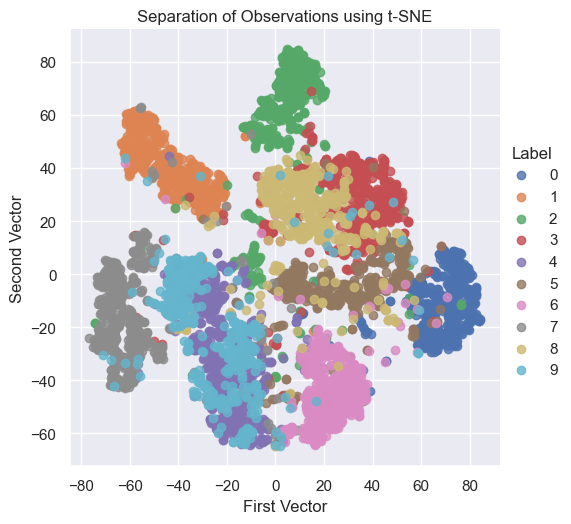

In [30]:
# t-SNE
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

# Other Dimensionality Reduction Algos

## Dictionary Learning    
- 원본 데이터의 희소 표현을 학습시킴    
- 결과 행렬은 사전(dictionary)라고 하며, 사전을 구성하는 벡터를 원자(atom)라고 함   
  원자는 0과 1로 채워진 간단한 이진 벡터.   
- 원본 데이터의 각 인스턴스는 이러한 원자의 가중 합으로 재구성될 수 있음    

- 원본 데이터에 d 피처가 있고 사전에 n개 원자가 있다고 가정하면, n<d인 과소완전(undercomplete)사전    
  n>d인 과대완전(overcomplete)사전을 가짐.  과소완전 사전은 차원 축소를ㄹ 통해   
  더 적은 수의 벡터로 원본 데이터를 재표현   


- 2차원 삼전도로 이미지를 시각화할 예정이라서 매우 조밀한 사전을 학습하지만    
  실전에서는 훨씬 희소한(sparse)한 버전을 사용

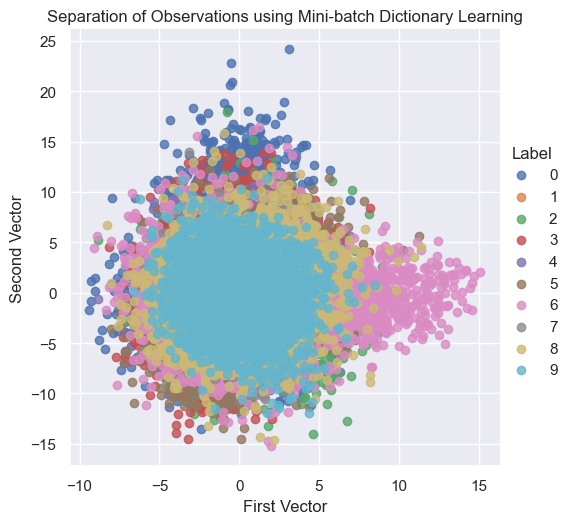

In [31]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = \
    miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = \
    pd.DataFrame(data=X_validation_miniBatchDictLearning, \
    index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

## ICA(Independent Component Analysis)

- 레이블이 없는 데이터의 공통 문제중 하나는 피처의 수많은 독립 신호가 함께 포함됨    
- ICA을 사용해 이러한 혼합 신호를 개별 성분으로 분리   
- 분리가 완료되면 생성된 개별 성분들은 여러 방식으로 조합해 원본 피처를 재구성할 수 있음   

- ICA는 일반적으로 신호 처리 작업에 사용  
  (ex, 바쁜 커피 하우스의 오디오 클럽에서 개별 음성을 식별하기 위해)   

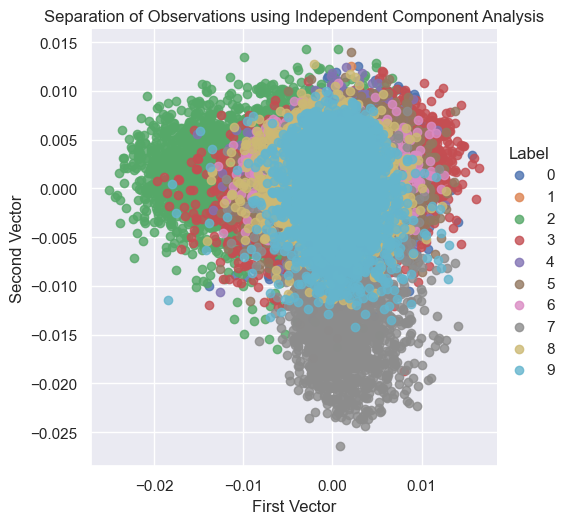

In [32]:
# Independent Component Analysis
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, \
                                    index=validation_index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

# Conclusion